In [296]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download(
    "jeffgallini/college-football-attendance-2000-to-2018"
)

print("Path to dataset files:", path)

Path to dataset files: /Users/jeongho/.cache/kagglehub/datasets/jeffgallini/college-football-attendance-2000-to-2018/versions/1


In [297]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import tensorflow as tf

In [298]:
import os

df = pd.read_csv(os.path.join(path, "CFBeattendance.csv"), encoding="latin-1")

In [299]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6672 entries, 0 to 6671
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              6672 non-null   object 
 1   Team              6672 non-null   object 
 2   Time              6672 non-null   object 
 3   Opponent          6672 non-null   object 
 4   Rank              6672 non-null   object 
 5   Site              6672 non-null   object 
 6   TV                6672 non-null   object 
 7   Result            6672 non-null   object 
 8   Attendance        6672 non-null   int64  
 9   Current Wins      6672 non-null   int64  
 10  Current Losses    6672 non-null   int64  
 11  Stadium Capacity  6672 non-null   int64  
 12  Fill Rate         6672 non-null   float64
 13  New Coach         6672 non-null   bool   
 14  Tailgating        6672 non-null   bool   
 15  PRCP              6672 non-null   float64
 16  SNOW              6672 non-null   float64


In [300]:
col_to_drop = ["Date", "Site", "Team", "Opponent"]

In [301]:
df = df.drop(col_to_drop, axis=1)

In [302]:
df.isna().sum()  # no missing value

Time                0
Rank                0
TV                  0
Result              0
Attendance          0
Current Wins        0
Current Losses      0
Stadium Capacity    0
Fill Rate           0
New Coach           0
Tailgating          0
PRCP                0
SNOW                0
SNWD                0
TMAX                0
TMIN                0
Opponent_Rank       0
Conference          0
Year                0
Month               0
Day                 0
dtype: int64

In [303]:
(df.dtypes)

Time                 object
Rank                 object
TV                   object
Result               object
Attendance            int64
Current Wins          int64
Current Losses        int64
Stadium Capacity      int64
Fill Rate           float64
New Coach              bool
Tailgating             bool
PRCP                float64
SNOW                float64
SNWD                float64
TMAX                  int64
TMIN                  int64
Opponent_Rank        object
Conference           object
Year                  int64
Month                 int64
Day                   int64
dtype: object

In [304]:
categorical_features = df.dtypes[(df.dtypes == "object")]

"""
1. df.dtypes: DataFrame의 각 열(column)의 데이터 타입을 보여줍니다.
2. df.dtypes == 'object': 각 열의 데이터 타입이 'object'인지 확인하여 True/False 값을 반환합니다.
3. df.dtypes[...]: 대괄호 안의 조건이 True인 열들만 선택합니다.
"""

"\n1. df.dtypes: DataFrame의 각 열(column)의 데이터 타입을 보여줍니다.\n2. df.dtypes == 'object': 각 열의 데이터 타입이 'object'인지 확인하여 True/False 값을 반환합니다.\n3. df.dtypes[...]: 대괄호 안의 조건이 True인 열들만 선택합니다.\n"

In [305]:
categorical_features = list(categorical_features.index)

categorical_features

['Time', 'Rank', 'TV', 'Result', 'Opponent_Rank', 'Conference']

In [306]:
categorical_features = [
    feature for feature in categorical_features if feature != "Result"
]

categorical_features

['Time', 'Rank', 'TV', 'Opponent_Rank', 'Conference']

In [307]:
def get_uniques(df, columns):
    return {column: list(df[column].unique()) for column in columns}

In [308]:
get_uniques(df, categorical_features)

{'Time': ['8:00 PM',
  '6:00 PM',
  '11:30 AM',
  '2:00 PM',
  '1:30 PM',
  '6:30 PM',
  '2:30 PM',
  '1:00 PM',
  '6:45 PM',
  '7:45 PM',
  '5:00 PM',
  '7:00 PM',
  '11:00 AM',
  '11:21 AM',
  '6:15 PM',
  '3:00 PM',
  '12:00 PM',
  '9:00 PM',
  '4:30 PM',
  '7:30 PM',
  '3:05 PM',
  '4:00 PM',
  '5:30 PM',
  '6:05 PM',
  '1:05 PM',
  '8:15 PM',
  '12:30 PM',
  '8:30 PM',
  '1:45 PM',
  '3:45 PM',
  '7:15 PM',
  '10:00 AM',
  '3:30 PM',
  '5:45 PM',
  '12:20 PM',
  '11:10 AM',
  '7:20 PM',
  '1:10 PM',
  '6:10 PM',
  '11:40 AM',
  '2:35 PM',
  '2:45 PM',
  '10:30 AM',
  '3:40 PM',
  '12:10 PM',
  '12:05 PM',
  '7:05 PM',
  '4:45 PM',
  '4:05 PM',
  '8:05 PM',
  '2:05 PM',
  '6:35 PM',
  '6:50 PM',
  '3:15 PM',
  '12:15 PM',
  '1:15 PM',
  '5:10 PM',
  '4:20 PM',
  '8:04 PM',
  '11:05 AM',
  '5:05 PM',
  '4:15 PM',
  '5:15 PM',
  '7:35 PM',
  '3:36 PM',
  '7:06 PM',
  '12:35 PM',
  '12:45 PM',
  '2:15 PM'],
 'Rank': ['NR',
  '14',
  '7',
  '11',
  '17',
  '15',
  '13',
  '5',
  '20',


In [309]:
nominal_features = ["Conference"]

ordinal_features = ["Time", "Rank", "Opponent_Rank"]

binary_features = ["TV", "New Coach", "Tailgating"]

In [310]:
## Binary Encode
# df['TV'] = df['TV'].apply(lambda x: x if x == 'Not on TV' else 'On TV')

df["TV"] = df["TV"].apply(lambda x: 0 if x == "Not on TV" else 1)

In [311]:
df["TV"].unique()

array([0, 1])

In [312]:
df["New Coach"] = df["New Coach"].astype(int)
df["Tailgating"] = df["Tailgating"].astype(int)

In [313]:
df["Rank"] = df["Rank"].apply(lambda x: 26 if x == "NR" else int(x))
df["Opponent_Rank"] = df["Opponent_Rank"].apply(lambda x: 26 if x == "NR" else int(x))

print(df["Rank"].unique())
print(df["Opponent_Rank"].unique())

[26 14  7 11 17 15 13  5 20 10 21 19 12  8  6 18 24 16 22 25 23  9  4  2
  3  1]
[26 25 24  9 17 18 10 14 21  6 13 23 20  1 15  2  8  7 12 19  4  5 16 22
  3 11]


In [314]:
df["Time"].unique()

time_ordering = sorted(df["Time"].unique())

df["Time"] = df["Time"].apply(lambda x: time_ordering.index(x))

In [315]:
df["Time"]

0       63
1       47
2       63
3        6
4       47
        ..
6667    45
6668    45
6669    45
6670    16
6671    16
Name: Time, Length: 6672, dtype: int64

In [316]:
# Nominal encode
df["Conference"].unique()

array(['SEC', 'Big-12', 'WAC', 'MWC', 'Independent', 'ACC', 'Pac-12',
       'Big-10', 'Mid-American', 'CUSA', 'AAC', 'Big East', 'Sun Belt',
       'FCS'], dtype=object)

In [317]:
def onehot_encode(df, column):
    dummies = pd.get_dummies(df[column], dtype=int)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop([column], axis=1)
    return df

In [318]:
df = onehot_encode(df, "Conference")

In [319]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6672 entries, 0 to 6671
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Time              6672 non-null   int64  
 1   Rank              6672 non-null   int64  
 2   TV                6672 non-null   int64  
 3   Result            6672 non-null   object 
 4   Attendance        6672 non-null   int64  
 5   Current Wins      6672 non-null   int64  
 6   Current Losses    6672 non-null   int64  
 7   Stadium Capacity  6672 non-null   int64  
 8   Fill Rate         6672 non-null   float64
 9   New Coach         6672 non-null   int64  
 10  Tailgating        6672 non-null   int64  
 11  PRCP              6672 non-null   float64
 12  SNOW              6672 non-null   float64
 13  SNWD              6672 non-null   float64
 14  TMAX              6672 non-null   int64  
 15  TMIN              6672 non-null   int64  
 16  Opponent_Rank     6672 non-null   int64  


In [320]:
df = df.drop([4355, 5442, 5449, 5456], axis=0)

In [321]:
y = df["Result"]
X = df.drop(["Result"], axis=1)

In [322]:
y

0        W 380
1       W 3831
2       W 2821
3        L 738
4        W 526
         ...   
6667    L 2027
6668    L 2427
6669     L 019
6670    L 3248
6671     L 739
Name: Result, Length: 6668, dtype: object

In [323]:
import re

y = y.apply(lambda x: re.search(r"^[^\s]*", x).group(0))


y.unique()

array(['W', 'L'], dtype=object)

In [324]:
# index_to_delete = y[(y == 'NC') | (y == 'White') | (y == 'Blue')].index

In [325]:
# index_to_delete

In [326]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y_mappings = {index: value for index, value in enumerate(label_encoder.classes_)}

In [327]:
y_mappings

{0: 'L', 1: 'W'}

In [328]:
X

,Time,Rank,TV,Attendance,Current Wins,Current Losses,Stadium Capacity,Fill Rate,New Coach,Tailgating,...,Big-12,CUSA,FCS,Independent,MWC,Mid-American,Pac-12,SEC,Sun Belt,WAC
0,63,26,0,53946,0,0,53727,1.004076,0,0,...,0,0,0,0,0,0,0,1,0,0
1,47,26,0,54286,1,0,53727,1.010404,0,0,...,0,0,0,0,0,0,0,1,0,0
2,63,26,1,51482,2,0,50019,1.029249,0,0,...,0,0,0,0,0,0,0,1,0,0
3,6,26,1,51162,3,0,50019,1.022851,0,0,...,0,0,0,0,0,0,0,1,0,0
4,47,26,0,50947,3,1,50019,1.018553,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6667,45,26,1,19412,0,3,51500,0.376932,0,0,...,0,1,0,0,0,0,0,0,0,0
6668,45,26,1,12809,0,5,51500,0.248718,0,0,...,0,1,0,0,0,0,0,0,0,0
6669,45,26,1,10787,0,7,51500,0.209456,0,0,...,0,1,0,0,0,0,0,0,0,0
6670,16,26,1,9690,1,8,51500,0.188155,0,0,...,0,1,0,0,0,0,0,0,0,0


In [329]:
scaler = MinMaxScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [330]:
X

,Time,Rank,TV,Attendance,Current Wins,Current Losses,Stadium Capacity,Fill Rate,New Coach,Tailgating,...,Big-12,CUSA,FCS,Independent,MWC,Mid-American,Pac-12,SEC,Sun Belt,WAC
0,0.926471,1.0,0.0,0.475769,0.000000,0.000000,0.406803,0.700775,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.691176,1.0,0.0,0.478899,0.083333,0.000000,0.406803,0.705510,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.926471,1.0,1.0,0.453085,0.166667,0.000000,0.365732,0.719610,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.088235,1.0,1.0,0.450139,0.250000,0.000000,0.365732,0.714823,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.691176,1.0,0.0,0.448160,0.250000,0.090909,0.365732,0.711607,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6663,0.661765,1.0,1.0,0.157841,0.000000,0.272727,0.382136,0.231535,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6664,0.661765,1.0,1.0,0.097052,0.000000,0.454545,0.382136,0.135604,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6665,0.661765,1.0,1.0,0.078437,0.000000,0.636364,0.382136,0.106227,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6666,0.235294,1.0,1.0,0.068338,0.083333,0.727273,0.382136,0.090289,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [331]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [367]:
inputs = tf.keras.Input(shape=(33,))
x = tf.keras.layers.Dense(16, activation="relu")(inputs)
x = tf.keras.layers.Dense(16, activation="relu")(x)
outputs = tf.keras.layers.Dense(1, activation="sigmoid")(x)


# inputs = tf.keras.Input(shape=(33, ))
# x = tf.keras.layers.Dense(64, activation='relu')(inputs)
# x = tf.keras.layers.Dropout(0.2)(x)  # Add dropout for regularization
# x = tf.keras.layers.Dense(32, activation='relu')(x)
# x = tf.keras.layers.Dropout(0.2)(x)  # Add dropout for regularization
# outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)


model = tf.keras.Model(inputs=inputs, outputs=outputs)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

metrics = [
    tf.keras.metrics.BinaryAccuracy(name="acc"),
    tf.keras.metrics.AUC(name="auc"),
]

model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=metrics)

batch_size = 32
epochs = 7

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
)

Epoch 1/7
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.5323 - auc: 0.4668 - loss: 0.6869 - val_acc: 0.6156 - val_auc: 0.5926 - val_loss: 0.6604
Epoch 2/7
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - acc: 0.6442 - auc: 0.6132 - loss: 0.6393 - val_acc: 0.6156 - val_auc: 0.6636 - val_loss: 0.6456
Epoch 3/7
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - acc: 0.6431 - auc: 0.6752 - loss: 0.6222 - val_acc: 0.6349 - val_auc: 0.6870 - val_loss: 0.6290
Epoch 4/7
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - acc: 0.6512 - auc: 0.6817 - loss: 0.6156 - val_acc: 0.6638 - val_auc: 0.7022 - val_loss: 0.6147
Epoch 5/7
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - acc: 0.6792 - auc: 0.6865 - loss: 0.6028 - val_acc: 0.6670 - val_auc: 0.7167 - val_loss: 0.6067
Epoch 6/7
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - acc: 0.6928 - auc: 0.7016 - loss: 0.5901 - val_acc: 0.6809 - val_auc: 0.7281 - val_loss: 0.5939
Epoch 7/7
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - acc: 0.7034 - auc: 0.7243 - loss: 0.5748 - val_acc: 0

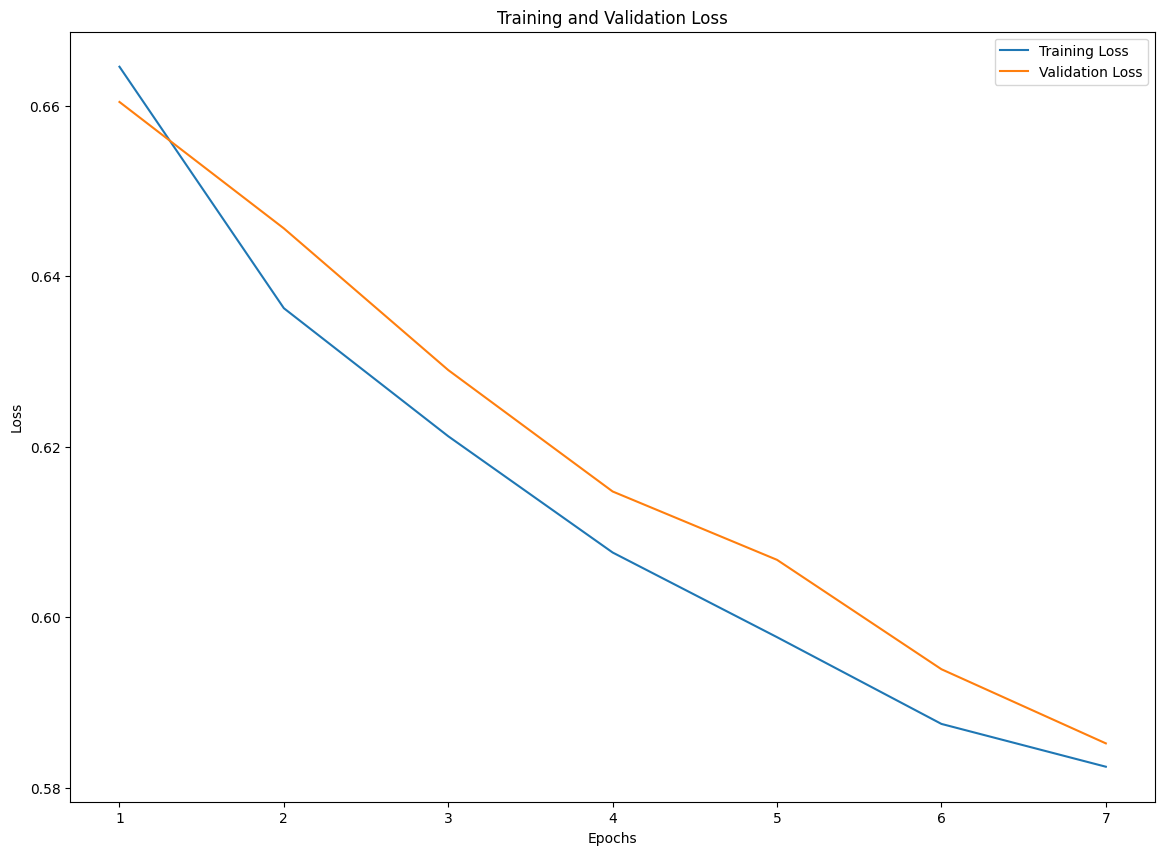

In [368]:
plt.figure(figsize=(14, 10))

epochs_range = range(1, epochs + 1)
train_loss = history.history["loss"]
val_loss = history.history["val_loss"]

plt.plot(epochs_range, train_loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")

plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [369]:
np.argmin(val_loss)

6

In [370]:
model.evaluate(X_test, y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - acc: 0.6685 - auc: 0.6721 - loss: 0.6038


[0.592997133731842, 0.6836581826210022, 0.6930145025253296]

In [373]:
y.sum() / len(y)

0.6415716856628674